# opt -- optimization

# Quick Start -- Unconstrained Minimization

The simplest is to define the objective function

In [1]:
import numpy as np
fun = lambda x: 0.5 * np.dot(x,x)

and use the function opt.ucon.minFG

In [2]:
import opt.ucon.descent as  ucon

In [3]:
ucon.minfg(np.ones(3), fun)

(array([ -4.99999996e-05,  -4.99999996e-05,   1.50000000e-04]),
 3.7499999792990662e-09,
 array([  4.14007669e-13,   4.14007669e-13,   1.00000000e-04]),
 0)

if the gradient is available

In [4]:
grad = lambda x: x

In [5]:
ucon.minfg(np.ones(3), fun, grad)

(array([ 0.,  0.,  0.]), 0.0, array([ 0.,  0.,  0.]), 0)

### The log files

There are two log files: xLog and globalLog

In [6]:
ucon.minfg(np.ones(3), fun, xLog='./x.log')

(array([ -4.99999996e-05,  -4.99999996e-05,   1.50000000e-04]),
 3.7499999792990662e-09,
 array([  4.14007669e-13,   4.14007669e-13,   1.00000000e-04]),
 0)

In [7]:
ucon.minfg(np.ones(3), fun,grad=grad, xLog='./xx.log')

(array([ 0.,  0.,  0.]), 0.0, array([ 0.,  0.,  0.]), 0)

### Using a Black Box

Instead of using a functios for computing separatevely the objective function and its gradient, we believe that a better approach is to define a subrutine that may compute both of them togethern when requiered saving time and computations effort.


In [8]:
def funBB(x, mode=0, counter=None):
    status = 0
    if mode ==0:
        return 0.5 * np.dot(x,x), status
    elif mode ==1:
        return x, status
    elif mode == 2:
        return 0.5 * np.dot(x,x), x, status
        

In [9]:
ucon.descentM(np.ones(3), funBB)

(array([ 0.,  0.,  0.]), 0.0, array([ 0.,  0.,  0.]), 0)

In [10]:
ucon.descentM(np.ones(2), funBB, xLog='./xxx.log', )

(array([ 0.,  0.]), 0.0, array([ 0.,  0.]), 0)

In [11]:
import opt.tools

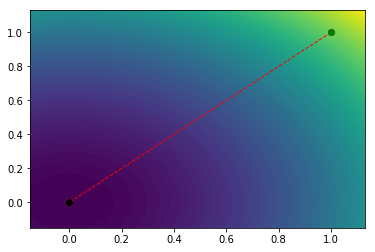

In [12]:
opt.tools.plot(funBB, files=[('./xxx.log', 'r')])

In [14]:
import opt.ucon.testF
sugar = opt.ucon.testF.sugar

In [24]:
ucon.descentM(-0.0001 * np.ones(2), sugar, xLog='./xxx.log', linearSearch_context={'step': 0.01})

(array([-0.20288934, -0.20288934]),
 -0.24760602557411265,
 array([ 0.00736021,  0.00736021]),
 0)

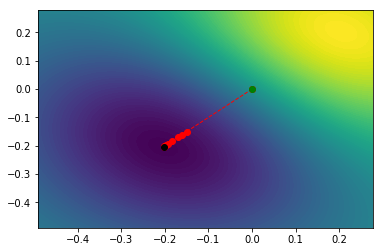

In [25]:
opt.tools.plot(sugar, files=[('./xxx.log', 'r')], x=[-0.4,0.2], y=[-0.4,0.2])

In [26]:
import opt.ucon.testF
rosenBB = opt.ucon.testF.rosenbrock

In [27]:
ucon.descentM(1.1 * np.ones(2), rosenBB, xLog='./xxx.log', linearSearch_context={'step': 0.001}, maxIter=150)

(array([ 1.01807669,  1.03655545]),
 0.00032733378040165201,
 array([ 0.00548858,  0.01506016]),
 0)

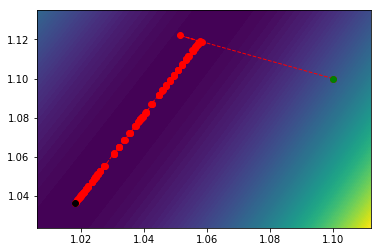

In [28]:
opt.tools.plot(rosenBB, files=[('./xxx.log', 'r')])